In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

from skimage.color import rgb2hsv, hsv2rgb

import scipy.signal

In [2]:
img = imageio.imread('Volga_Ulyanovsk-oliv.jpg')

In [3]:
print(img.shape)


(1536, 2048, 3)


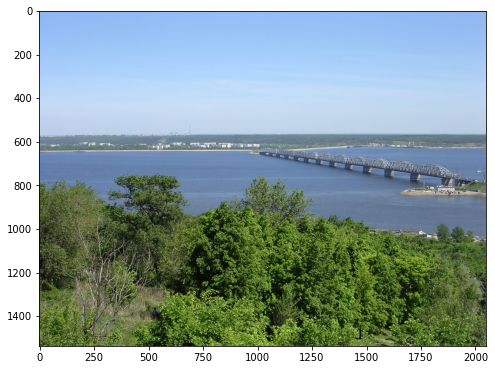

In [4]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [12]:
img_crop = np.copy(img[910:1180, 920:1250])
print(img_crop.shape)

(270, 330, 3)


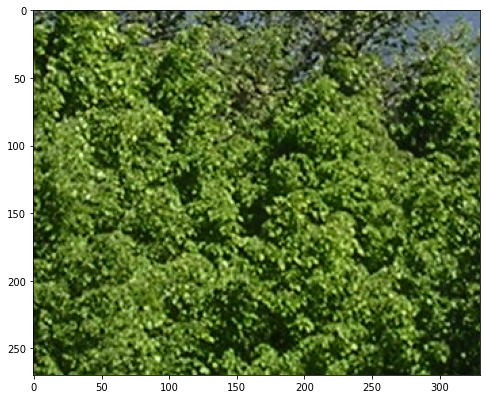

In [13]:
plt.figure(figsize=(8, 8))
plt.imshow(img_crop, cmap='gray')

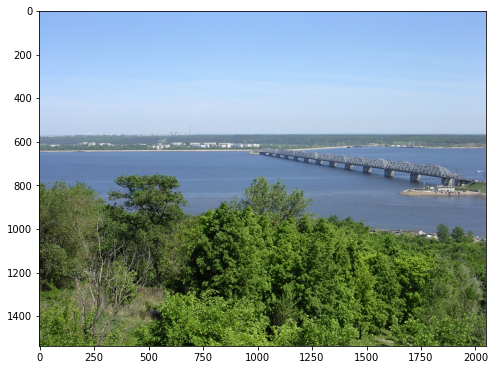

In [18]:
# преобразование во float 32
img_32 = img.astype(np.float32) / 255.
plt.figure(figsize=(8, 8))
plt.imshow(img_32)

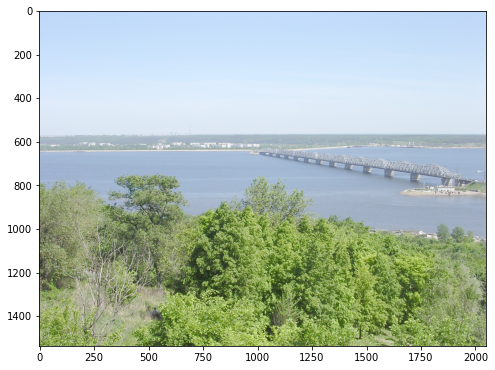

In [19]:
plt.figure(figsize=(8, 8))
plt.imshow(img_32**0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


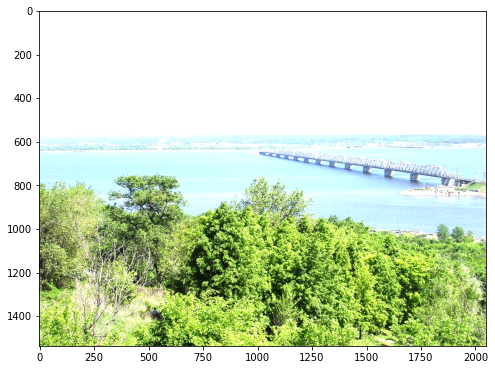

In [20]:
plt.figure(figsize=(8, 8))
plt.imshow(img_32*2)

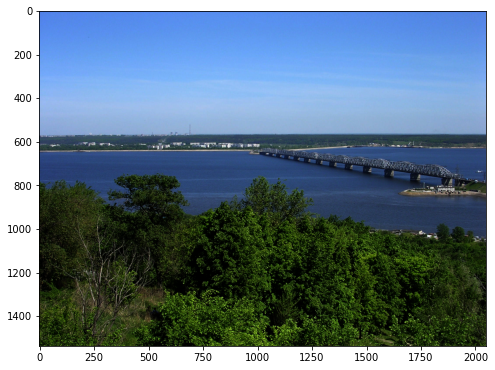

In [21]:
plt.figure(figsize=(8, 8))
plt.imshow(img_32**2)

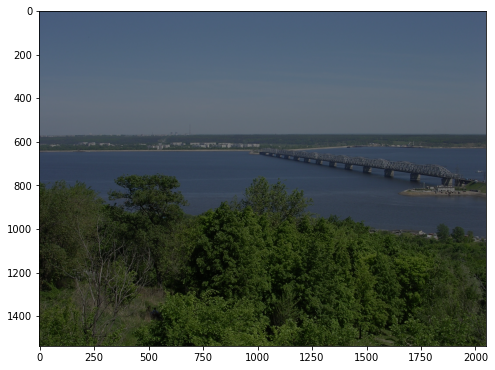

In [22]:
plt.figure(figsize=(8, 8))
plt.imshow(img_32/2)

In [23]:
img_hsv = np.copy(rgb2hsv(img))


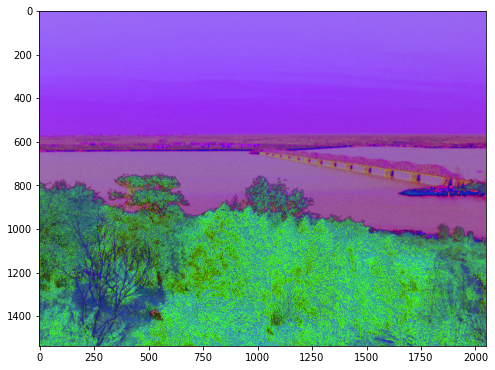

In [24]:
plt.figure(figsize=(8, 8))
plt.imshow(img_hsv)

In [25]:
img_hsv[:, :, 1] /= 2
img_new = hsv2rgb(img_hsv)

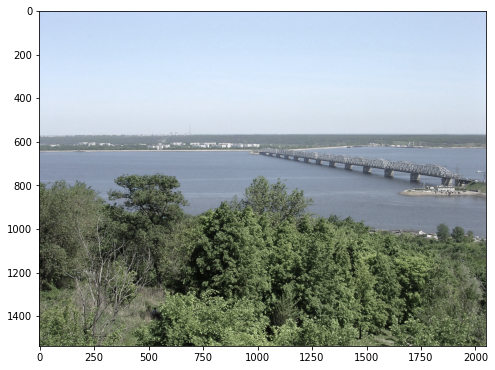

In [26]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

In [27]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] *= 4
img_new = hsv2rgb(img_hsv_new)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


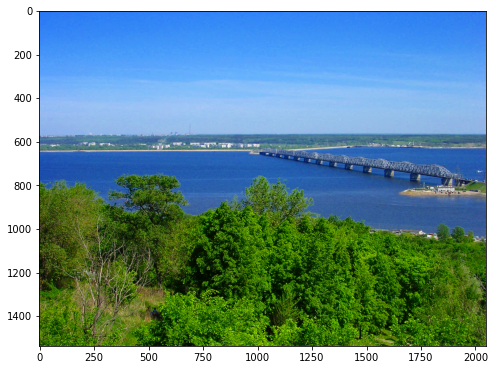

In [28]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

In [30]:
img = imageio.imread('Volga_Ulyanovsk-oliv.jpg')
img = img[:,:,0].astype(np.float32) / 255.
print(img.shape)

(1536, 2048)


In [31]:
if 1:
    win_size = (7, 7)
    sigma = 3
    w = np.zeros(win_size, dtype=np.float32)
    for i in range(w.shape[0]):
        for j in range(w.shape[1]):
            w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2 
                            -(j-w.shape[1]//2)**2 / sigma**2 / 2)
    w = w / np.sum(w)

In [32]:
%%time

out_img = np.zeros(
    (img.shape[0] - w.shape[0] + 1,
     img.shape[1] - w.shape[1] + 1), 
     dtype=np.float32)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img[i:i+w.shape[0], j:j+w.shape[1]]

        out_img[i,j] = np.sum(w * x)

CPU times: user 1min 55s, sys: 242 ms, total: 1min 55s
Wall time: 1min 56s


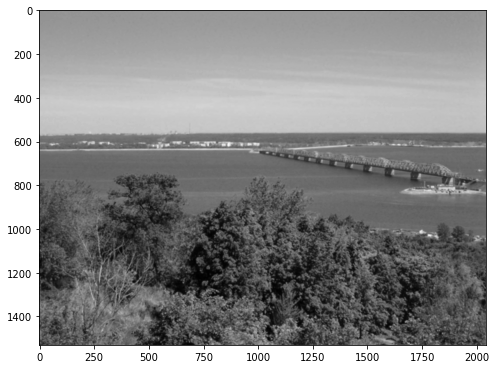

In [33]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img, cmap='gray')

In [34]:
%%time

out_img_1 = scipy.signal.correlate2d(img, w, mode='valid')

CPU times: user 460 ms, sys: 4.01 ms, total: 464 ms
Wall time: 464 ms


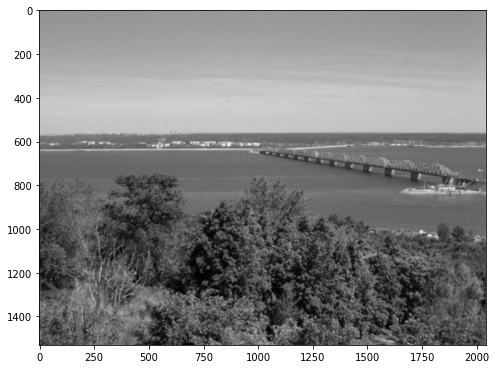

In [35]:
plt.figure(figsize=(8, 8))
plt.imshow(np.abs(out_img_1), cmap='gray')

In [38]:
my_filt = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0,1]])

def my_filter(x):
    # Box blur
    return np.mean(x * my_filt)

In [39]:
win_size = (3, 3) # размер окна

out_img = np.zeros(
    (img.shape[0] - win_size[0] + 1,
     img.shape[1] - win_size[1] + 1), 
     dtype=np.float32)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img[i:i+win_size[0], j:j+win_size[1]]
        out_img[i,j] = my_filter(x)

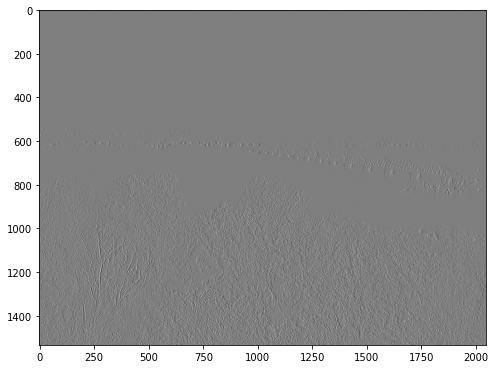

In [40]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img, cmap='gray')

In [41]:
threshold = 0.03 # порог бинаризации
#out_img_1 = np.mean(out_img)
img_bin = (out_img > threshold).astype(np.uint8)

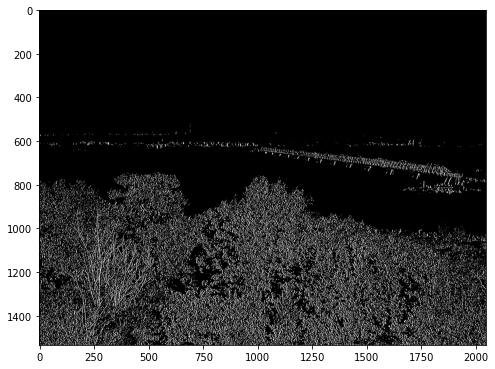

In [42]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bin*255, cmap='gray')